# Car Prices Model

Notebook to predict car prices using a dataset from Kaggle. You can find more information about the dataset [here][dataset].

[dataset]: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction


In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [146]:
# Create directories to export reports and models
os.makedirs("reports", exist_ok=True)
os.makedirs("models", exist_ok=True)

In [147]:
# Read the dataset
df_car_prices = pd.read_csv("datasets/car_prices.csv")

In [148]:
# Show information about the dataset
df_car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [149]:
# Drop columns "car_ID" and "CarName" because they are not useful for the analysis
df_car_prices = df_car_prices.drop(columns=["car_ID", "CarName"])

# Drop "enginelocation" column because 99% of the values are the same
df_car_prices = df_car_prices.drop(columns=["enginelocation"])

## Exploratory Data Analysis


In [150]:
df_car_prices_eda = df_car_prices.copy()

In [151]:
# Show the first 10 rows
df_car_prices_eda.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
3,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
4,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
5,2,gas,std,two,sedan,fwd,99.8,177.3,66.3,53.1,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,gas,std,four,sedan,fwd,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,gas,std,four,wagon,fwd,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,gas,turbo,four,sedan,fwd,105.8,192.7,71.4,55.9,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,gas,turbo,two,hatchback,4wd,99.5,178.2,67.9,52.0,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Data Overview

| Column Name        | Type       | Description                                                                                                             |
| ------------------ | ---------- | ----------------------------------------------------------------------------------------------------------------------- |
| symboling          | Discrete   | Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. |
| fueltype           | Nominal    | Car fuel type i.e gas or diesel                                                                                         |
| aspiration         | Nominal    | Aspiration used in a car                                                                                                |
| doornumber         | Ordinal    | Number of doors in a car                                                                                                |
| carbody            | Nominal    | body of car                                                                                                             |
| drivewheel         | Nominal    | type of drive wheel                                                                                                     |
| enginelocation     | Nominal    | Location of car engine                                                                                                  |
| wheelbase          | Continuous | Weelbase of car                                                                                                         |
| carlength          | Continuous | Length of car                                                                                                           |
| carwidth           | Continuous | Width of car                                                                                                            |
| carheight          | Continuous | height of car                                                                                                           |
| curbweight         | Continuous | The weight of a car without occupants or baggage.                                                                       |
| enginetype         | Nominal    | Type of engine.                                                                                                         |
| cylindernumber     | Ordinal    | cylinder placed in the car                                                                                              |
| enginesize         | Continuous | Size of car                                                                                                             |
| fuelsystem         | Nominal    | Fuel system of car                                                                                                      |
| boreratio          | Continuous | Boreratio of car                                                                                                        |
| stroke             | Continuous | Stroke or volume inside the engine                                                                                      |
| compressionratio   | Continuous | compression ratio of car                                                                                                |
| horsepower         | Continuous | Horsepower                                                                                                              |
| peakrpm            | Continuous | car peak rpm                                                                                                            |
| citympg            | Continuous | Mileage in city                                                                                                         |
| highwaympg         | Continuous | Mileage on highway                                                                                                      |
| **price (target)** | Continuous | Price of car                                                                                                            |


In [152]:
ordinal_columns = ["doornumber", "cylindernumber"]
nominal_columns = [
    "fueltype",
    "aspiration",
    "carbody",
    "drivewheel",
    "enginetype",
    "fuelsystem",
]
numerical_columns = [
    "symboling",
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg",
]

In [153]:
df_car_prices_eda.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [154]:
import sweetviz as sv

report = sv.analyze(df_car_prices_eda)
report.show_html("reports/car_prices_report.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report reports/car_prices_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Columns with higher correlation with the target

| Column name    | Correlation | Classification |
| -------------- | ----------- | -------------- |
| enginesize     | 0.87        | High           |
| curbweight     | 0.84        | High           |
| horsepower     | 0.81        | High           |
| cylindernumber | 0.80        | High           |
| carwidth       | 0.76        | High           |
| highwaympg     | 0.70        | High           |
| citympg        | 0.69        | High           |
| carlength      | 0.68        | High           |
| drivewheel     | 0.64        | High           |
| fuelsystem     | 0.60        | High           |
| wheelbase      | 0.58        | Moderate       |
| bore_ratio     | 0.55        | Moderate       |
| enginetype     | 0.47        | Moderate       |
| symboling      | 0.37        | Low            |
| carbody        | 0.37        | Low            |


### Detecting outliers

Detect outliers in the columns with moderate and high correlation with the target.


Text(0.5, 1.0, 'Price Boxplot')

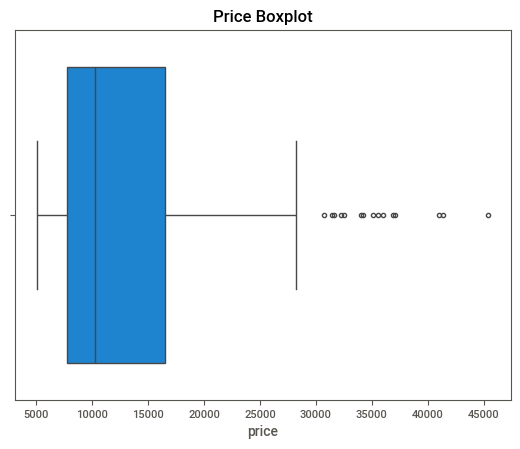

In [155]:
sns.boxplot(x="price", data=df_car_prices_eda)
plt.title("Price Boxplot")

Text(0.5, 1.0, 'Engine Size Boxplot')

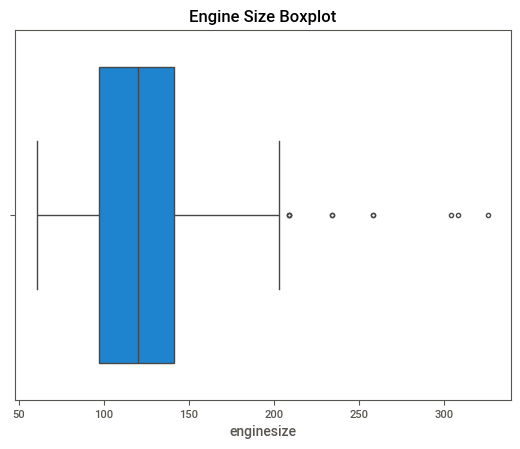

In [156]:
sns.boxplot(x="enginesize", data=df_car_prices_eda)
plt.title("Engine Size Boxplot")

Text(0.5, 1.0, 'Horsepower Boxplot')

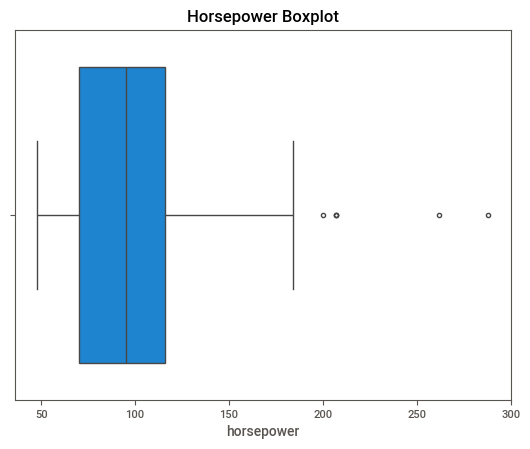

In [157]:
sns.boxplot(x="horsepower", data=df_car_prices_eda)
plt.title("Horsepower Boxplot")

Text(0.5, 1.0, 'Curb Weight Boxplot')

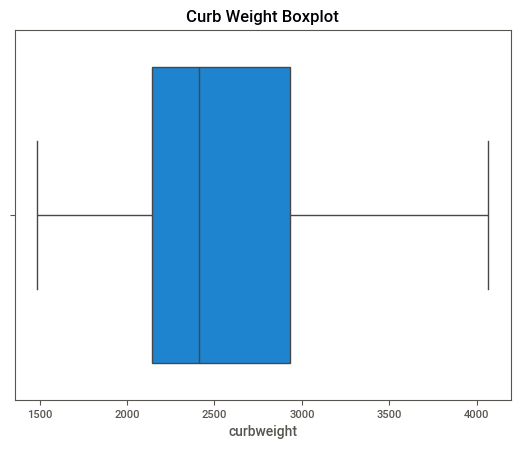

In [158]:
sns.boxplot(x="curbweight", data=df_car_prices_eda)
plt.title("Curb Weight Boxplot")

Text(0.5, 1.0, 'Car Width Boxplot')

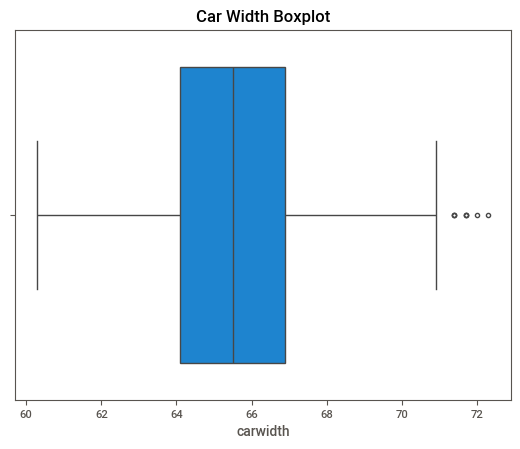

In [159]:
sns.boxplot(x="carwidth", data=df_car_prices_eda)
plt.title("Car Width Boxplot")

Text(0.5, 1.0, 'Car Length Boxplot')

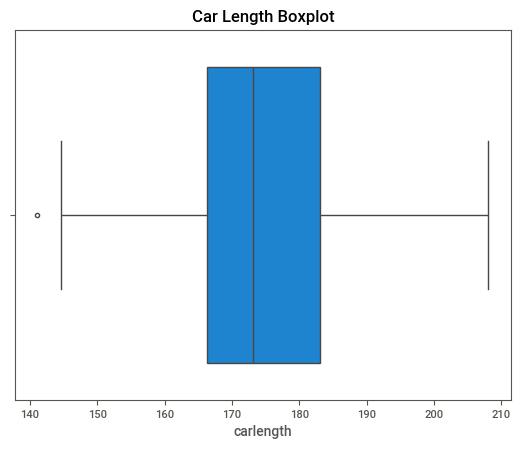

In [160]:
sns.boxplot(x="carlength", data=df_car_prices_eda)
plt.title("Car Length Boxplot")

Text(0.5, 1.0, 'Highway MPG Boxplot')

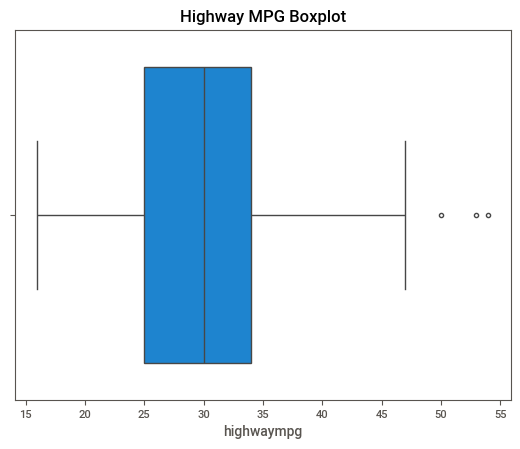

In [161]:
sns.boxplot(x="highwaympg", data=df_car_prices_eda)
plt.title("Highway MPG Boxplot")

Text(0.5, 1.0, 'Fuel System vs Price')

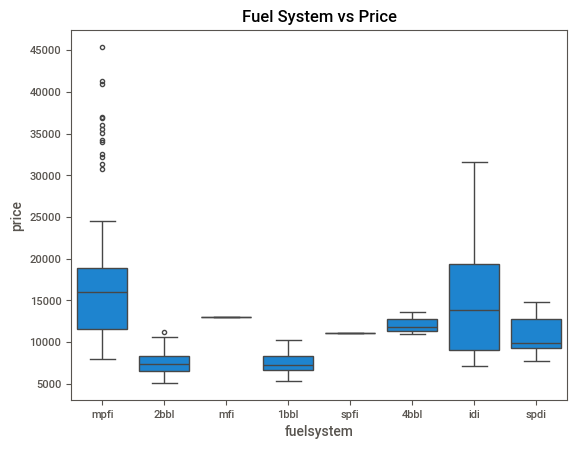

In [162]:
sns.boxplot(x="fuelsystem", y="price", data=df_car_prices_eda)
plt.title("Fuel System vs Price")

Text(0.5, 1.0, 'Engine Size vs Price')

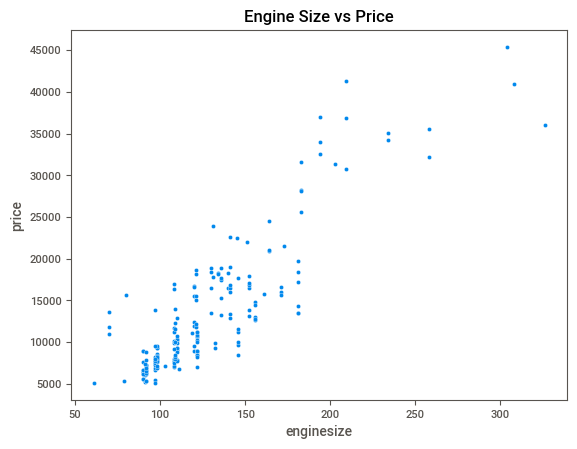

In [163]:
sns.scatterplot(x="enginesize", y="price", data=df_car_prices_eda)
plt.title("Engine Size vs Price")

Text(0.5, 1.0, 'Curb Weight vs Price')

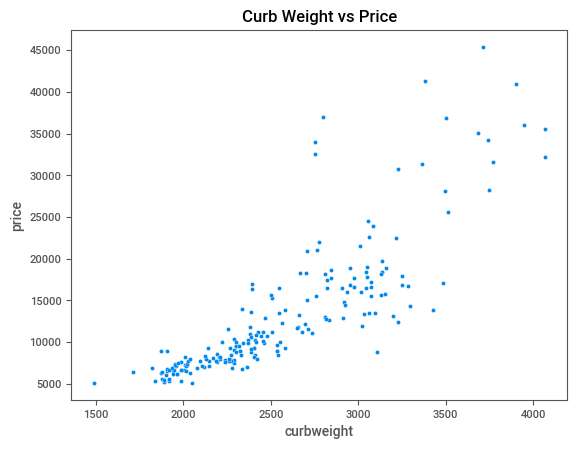

In [164]:
sns.scatterplot(x="curbweight", y="price", data=df_car_prices_eda)
plt.title("Curb Weight vs Price")

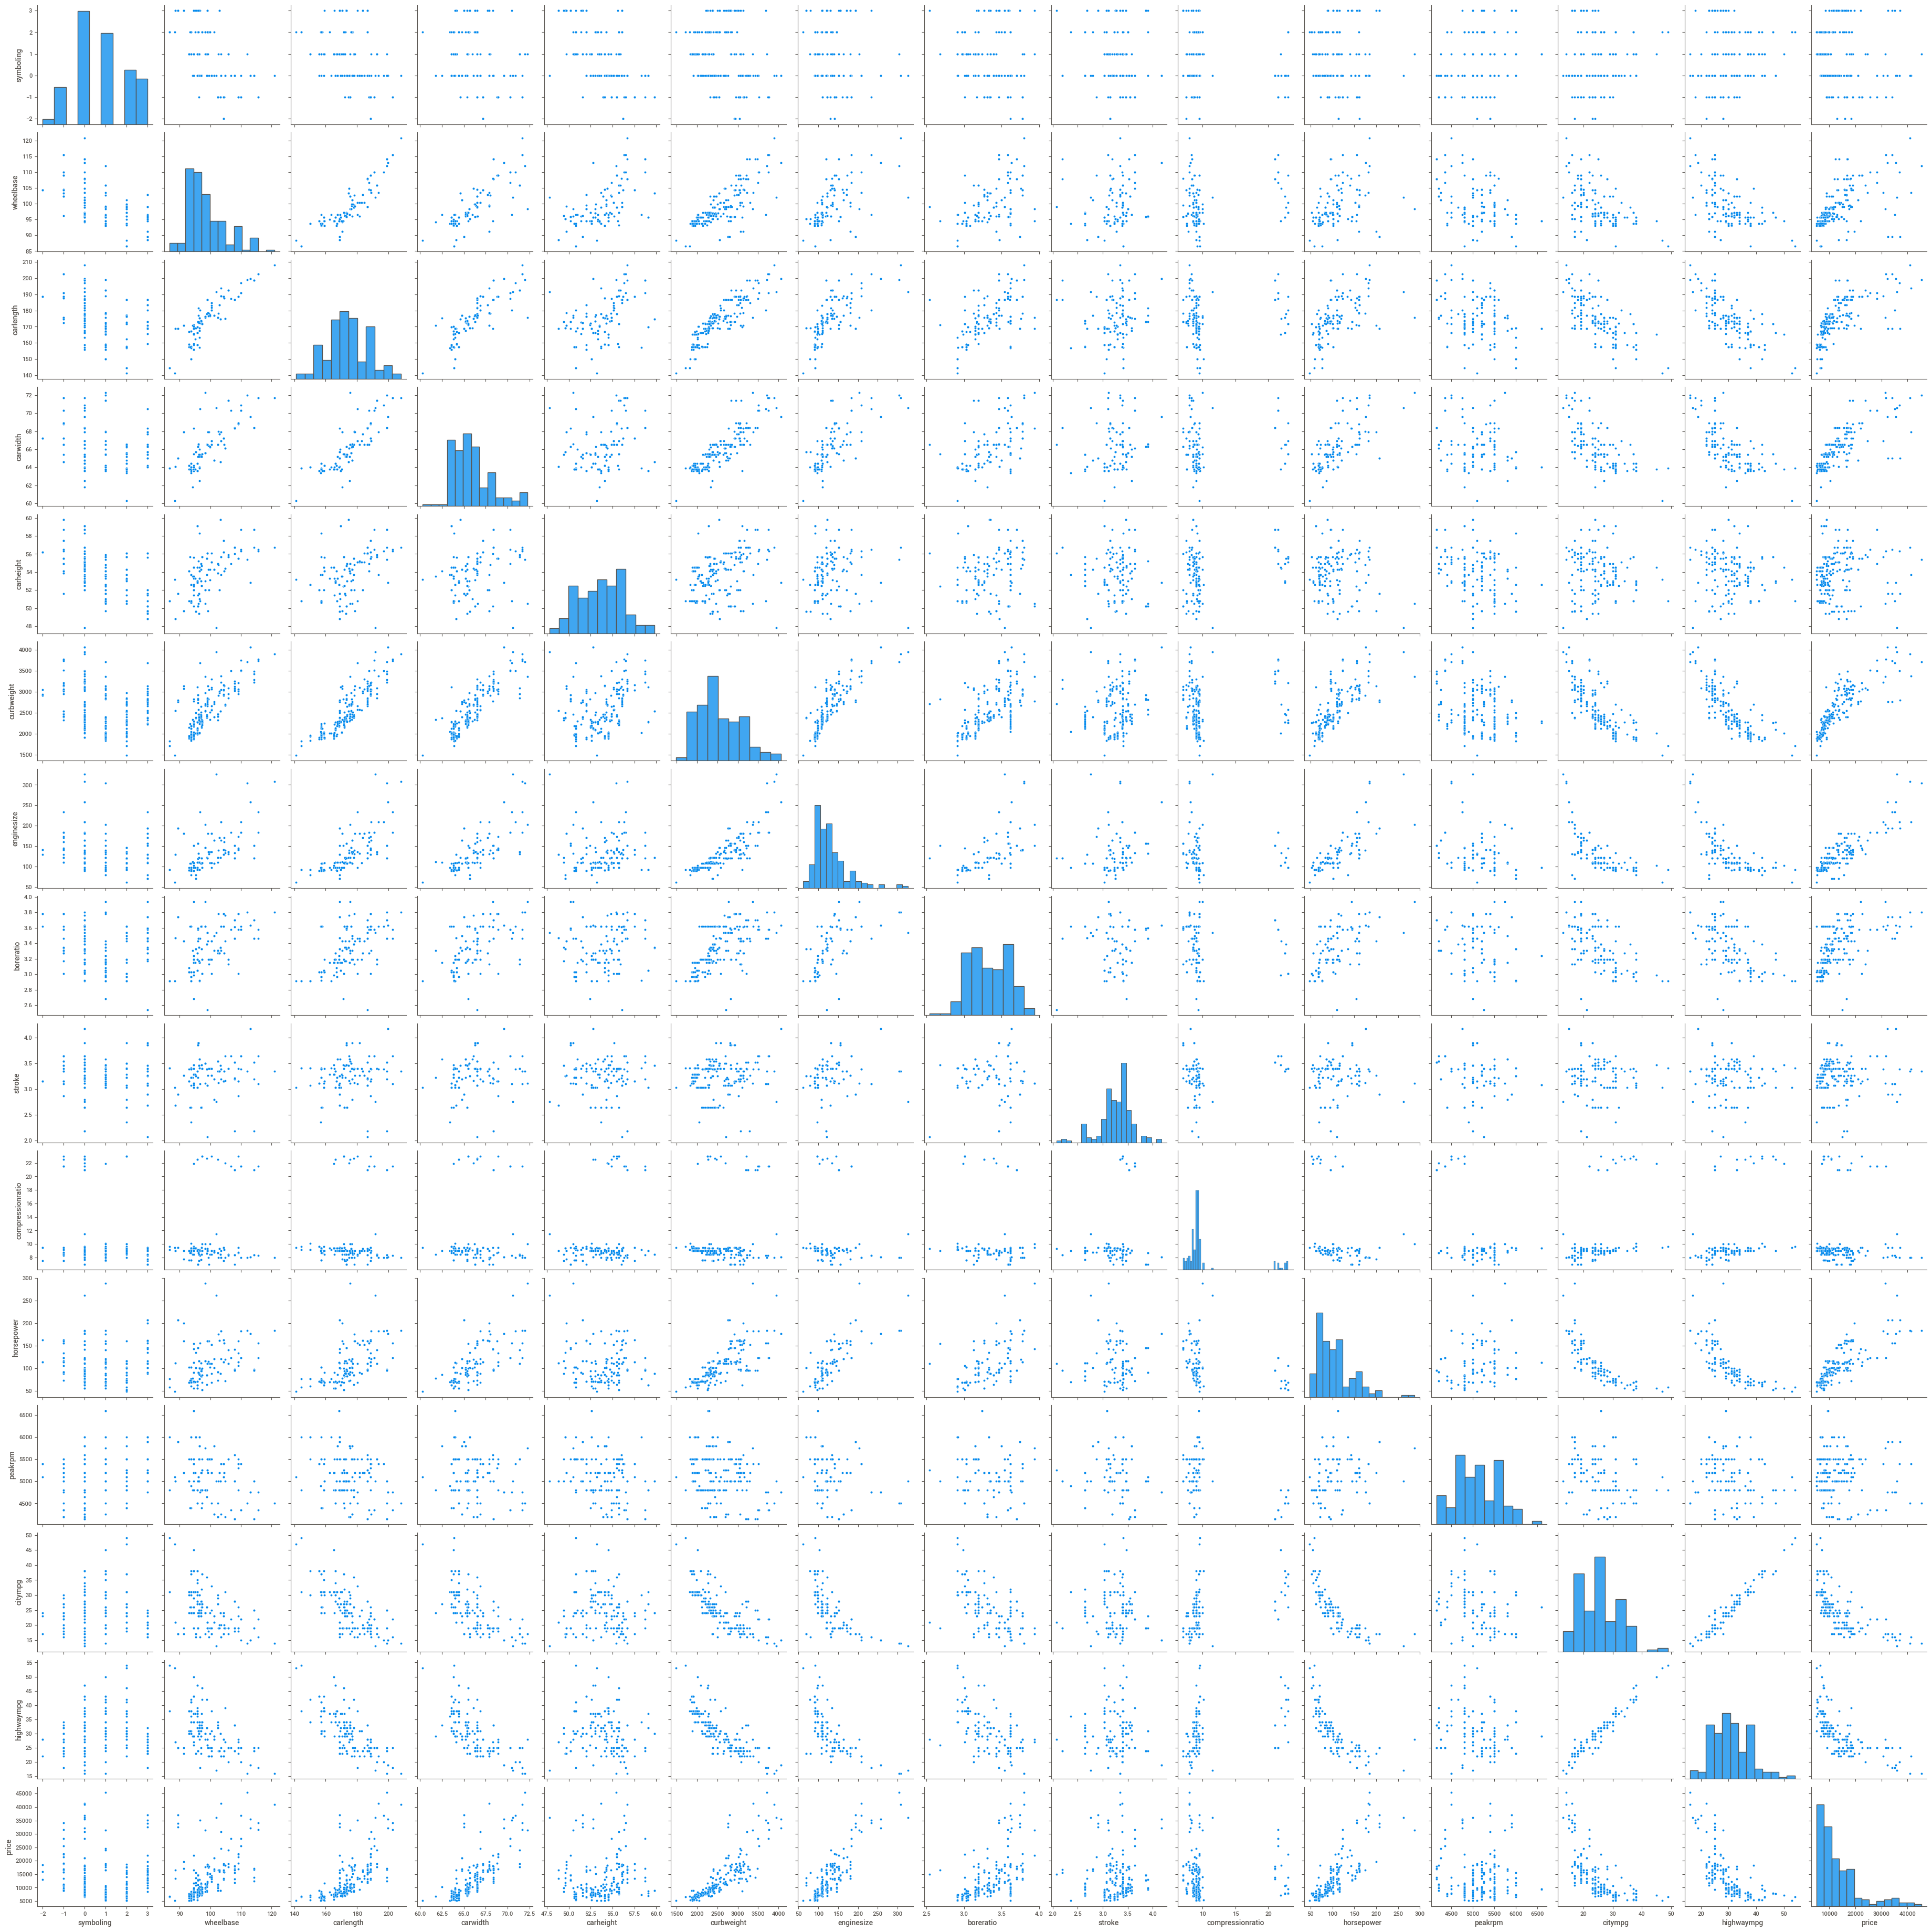

In [165]:
plot = sns.pairplot(df_car_prices_eda)
plot.savefig("reports/car_prices_pairplot.png")

## Correlation Matrix


In [166]:
df_car_prices_eda = pd.get_dummies(
    df_car_prices_eda,
    columns=nominal_columns,
    dtype="int64",
)

In [167]:
df_car_prices_eda.doornumber = df_car_prices_eda.doornumber.map({"two": 2, "four": 4})
df_car_prices_eda.cylindernumber = df_car_prices_eda.cylindernumber.map(
    {
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "eight": 8,
        "twelve": 12,
    }
)

In [168]:
df_car_prices_eda.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0


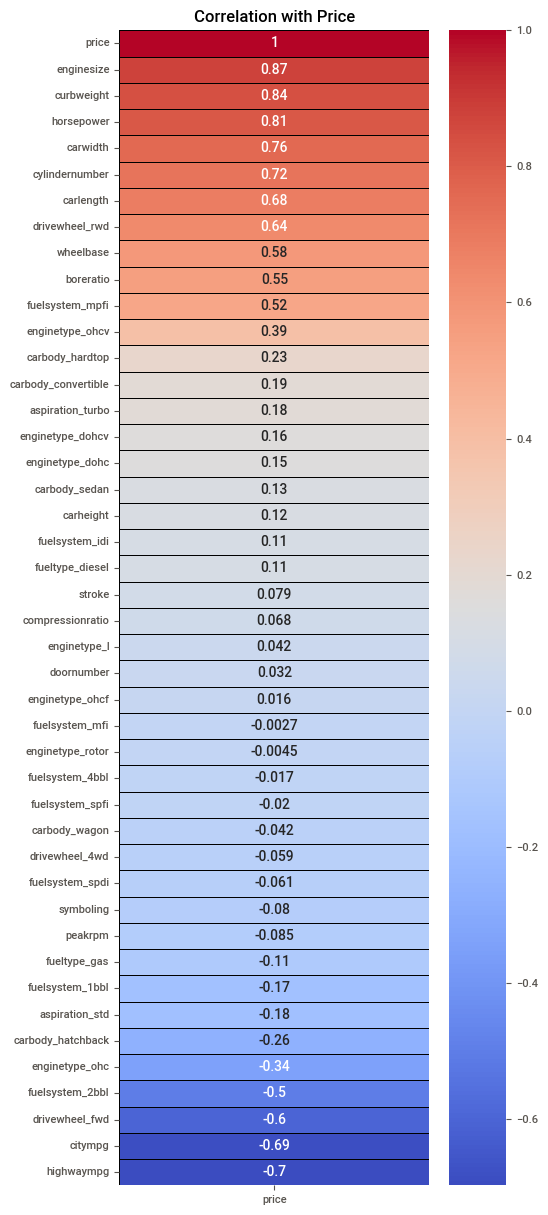

In [169]:
plt.figure(figsize=(5, 15))
plt.title("Correlation with Price")
sns.heatmap(
    df_car_prices_eda.corr()["price"].sort_values(ascending=False).to_frame(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black",
)
plt.savefig("reports/car_prices_correlation.png")

## Training the model


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

### Hypothesis 1: Using all columns


In [171]:
X = df_car_prices.drop(columns=["price"])
y = df_car_prices["price"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=51
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153, 22), (52, 22), (153,), (52,))

In [173]:
# Pipeline:
# 1. OneHotEncode nominal columns
# 2. Scale numerical columns
# 3. Encode ordinal columns
# 4. Fit a Linear Regression model


preprocessor = ColumnTransformer(
    transformers=[
        ("onehotencode", OneHotEncoder(handle_unknown="error"), nominal_columns),
        (
            "ordinalencode",
            OrdinalEncoder(
                handle_unknown="error",
                categories=[
                    ["two", "four"],
                    ["two", "three", "four", "five", "six", "eight", "twelve"],
                ],
            ),
            ordinal_columns,
        ),
        ("scale", StandardScaler(), numerical_columns),
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)

In [174]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencode',
                                                  OneHotEncoder(),
                                                  ['fueltype', 'aspiration',
                                                   'carbody', 'drivewheel',
                                                   'enginetype',
                                                   'fuelsystem']),
                                                 ('ordinalencode',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'four'],
                                                                             ['two',
                                                                              'three',
                                                                              'four',
                                                                              'five',
                                                                              'six',
                                                                              'eight',
                                                                              'twelve']]),
                                                  ['doornumber',
                                                   'cylindernumber']),
                                                 ('scale', StandardScaler(),
                                                  ['symboling', 'wheelbase',
                                                   'carlength', 'carwidth',
                                                   'carheight', 'curbweight',
                                                   'enginesize', 'boreratio',
                                                   'stroke', 'compressionratio',
                                                   'horsepower', 'peakrpm',
                                                   'citympg',
                                                   'highwaympg'])])),
                ('regressor', LinearRegression())])

#### Metrics


In [175]:
# Predict the test set
y_pred = model.predict(X_test)

In [176]:
# R2 Score
r2_score(y_test, y_pred)

-1.4631261415439908e+22

### Hypothesis 2: Using only columns with high correlation

Use only the columns with correlation higher than **0.6**.


In [177]:
# Filter columns with highest correlation
min_corr = 0.6
corr = df_car_prices_eda.corr()
high_corr_columns = corr[abs(corr["price"]) >= min_corr].index

# Undo OneHotEncoding
high_corr_columns = [col.split("_")[0] for col in high_corr_columns]
high_corr_columns = list(set(high_corr_columns))

print("The columns with highest correlation are:")
print("\n".join([f"- {col}" for col in high_corr_columns]))

The columns with highest correlation are:
- horsepower
- highwaympg
- enginesize
- curbweight
- carlength
- carwidth
- citympg
- price
- drivewheel
- cylindernumber


In [178]:
ordinal_columns = [col for col in ordinal_columns if col in high_corr_columns]
nominal_columns = [col for col in nominal_columns if col in high_corr_columns]
numerical_columns = [col for col in numerical_columns if col in high_corr_columns]

In [179]:
# Drop columns with low correlation
df_car_prices_filtered = df_car_prices[high_corr_columns]

In [180]:
X = df_car_prices_filtered.drop(columns=["price"])
y = df_car_prices_filtered["price"]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=51
)

In [182]:
# Pipeline:
# 1. OneHotEncode nominal columns
# 2. Scale numerical columns
# 3. Encode ordinal columns
# 4. Fit a Linear Regression model
preprocessor = ColumnTransformer(
    transformers=[
        ("onehotencode", OneHotEncoder(handle_unknown="error"), nominal_columns),
        (
            "ordinalencode",
            OrdinalEncoder(
                handle_unknown="error",
                categories=[["two", "three", "four", "five", "six", "eight", "twelve"]],
            ),
            ordinal_columns,
        ),
        ("scale", StandardScaler(), numerical_columns),
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)

In [183]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencode',
                                                  OneHotEncoder(),
                                                  ['drivewheel']),
                                                 ('ordinalencode',
                                                  OrdinalEncoder(categories=[['two',
                                                                              'three',
                                                                              'four',
                                                                              'five',
                                                                              'six',
                                                                              'eight',
                                                                              'twelve']]),
                                                  ['cylindernumber']),
                                                 ('scale', StandardScaler(),
                                                  ['carlength', 'carwidth',
                                                   'curbweight', 'enginesize',
                                                   'horsepower', 'citympg',
                                                   'highwaympg'])])),
                ('regressor', LinearRegression())])

#### Metrics


In [184]:
# Predict the test set
y_pred = model.predict(X_test)

In [185]:
r2_score(y_test, y_pred)

0.7635628376449766

In [186]:
mean_absolute_error(y_test, y_pred)

2424.207024533078

#### Residuals analysis


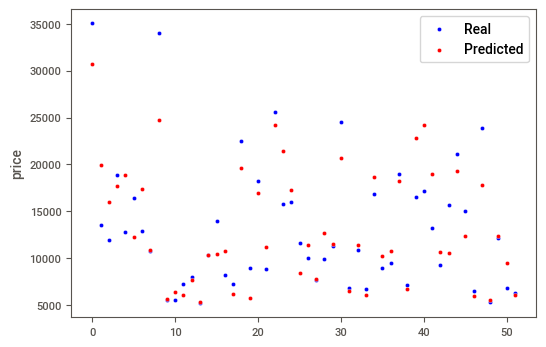

In [191]:
# Display the difference between the real and predicted values of the test set using a scatter plot
x_axis = range(len(y_test))
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x_axis, y=y_test, color="blue", label="Real")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Predicted")
plt.legend()
plt.show()